In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
import random

In [2]:
import pandas as pd

df = pd.read_csv("the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data.csv")

In [3]:
patient_id = list(df["Patient ID"])
recording_loc = list(df["Recording locations:"])
murmur = list(df["Murmur"])
murmur_loc = list(df["Murmur locations"])
systolic_murmur_timing = list(df["Systolic murmur timing"])
print(patient_id)
print(recording_loc)
print(murmur)
print(murmur_loc)
print(systolic_murmur_timing)

[2530, 9979, 9983, 13918, 14241, 14998, 23625, 24160, 29045, 29378, 31737, 33151, 36327, 38337, 39043, 39403, 39456, 40058, 40798, 40840, 43852, 44514, 45843, 46065, 46532, 46579, 46778, 47002, 49558, 49561, 49562, 49568, 49572, 49574, 49577, 49585, 49595, 49598, 49607, 49610, 49618, 49622, 49627, 49628, 49630, 49631, 49638, 49641, 49653, 49659, 49661, 49669, 49678, 49683, 49687, 49691, 49704, 49712, 49719, 49729, 49735, 49745, 49748, 49751, 49754, 49761, 49776, 49808, 49821, 49823, 49824, 49829, 49832, 49838, 49839, 49842, 49850, 49853, 49854, 49873, 49876, 49896, 49897, 49900, 49930, 49931, 49946, 49952, 49959, 49960, 49963, 49966, 49968, 49969, 49970, 49974, 49978, 49979, 49980, 49983, 49986, 49987, 49988, 49989, 49990, 49993, 49994, 49995, 49998, 49999, 50001, 50004, 50005, 50006, 50007, 50008, 50009, 50012, 50014, 50015, 50017, 50018, 50023, 50026, 50027, 50029, 50030, 50032, 50034, 50037, 50043, 50047, 50048, 50049, 50053, 50054, 50056, 50057, 50061, 50066, 50067, 50070, 50072, 5

In [4]:
recording_loc = [x.split("+") for x in recording_loc]

for i in range(len(murmur_loc)):
    if murmur_loc[i] is np.nan:
        murmur_loc[i] = []
    else:
        murmur_loc[i] = murmur_loc[i].split("+")

In [5]:
X = []
y = []

for i in range(len(patient_id)):
    if murmur[i] == "Absent":
        for recloc in recording_loc[i]:
            full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
            initial = 0
            while (initial+400) <= len(full_recording):
                X.append(full_recording[initial:initial+400])
                y.append([1, 0, 0, 0, 0])
                initial += 200
    elif murmur[i] == "Present":
        for recloc in recording_loc[i]:
            if recloc in murmur_loc[i]:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                if systolic_murmur_timing[i] == "Holosystolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 1, 0, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Early-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 1, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Mid-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 1, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Late-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 0, 1])
                        initial += 200
                else:
                    print("Error on patient ID:", patient_id[i])
            else:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                while (initial+400) <= len(full_recording):
                    X.append(full_recording[initial:initial+400])
                    y.append([1, 0, 0, 0, 0])
                    initial += 200

Error on patient ID: 85119
Error on patient ID: 85119


In [6]:
time_steps = 400
feature_length = 18
batch_size = 3

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25)

In [8]:
X_train_final = []
y_train_final = []

for i in range(len(X_train)):
    if y_train[i] == [1, 0, 0, 0, 0]:
        #randnum = random.uniform(0, 1)
        randnum = random.random()
        if randnum >= 0.66:
            X_train_final.append(X_train[i])
            y_train_final.append(y_train[i])
    else:
        X_train_final.append(X_train[i])
        y_train_final.append(y_train[i])

In [9]:
print(len(X_train), len(y_train))
print(len(X_train_final), len(y_train_final))
print(len(X_test), len(y_test))

22341 22341
10019 10019
7447 7447


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_final = np.array(X_train_final)
y_train_final = np.array(y_train_final)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
model = Sequential()
model.add(LSTM(256, input_shape = (400, 18), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 400, 256)          281600    
                                                                 
 dropout_2 (Dropout)         (None, 400, 256)          0         
                                                                 
 lstm_4 (LSTM)               (None, 400, 128)          197120    
                                                                 
 dropout_3 (Dropout)         (None, 400, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 528453 (2.02 MB)
Trainable params: 52845

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train_final, y_train_final, epochs=10, batch_size=batch_size)

Epoch 1/10
3340/3340 [==============================] - 1767s 526ms/step - loss: 0.9919 - accuracy: 0.6335
Epoch 2/10
3340/3340 [==============================] - 1989s 596ms/step - loss: 0.9853 - accuracy: 0.6330
Epoch 3/10
3340/3340 [==============================] - 1857s 556ms/step - loss: 0.9836 - accuracy: 0.6337
Epoch 4/10
3340/3340 [==============================] - 2000s 599ms/step - loss: 0.9777 - accuracy: 0.6348
Epoch 5/10
3340/3340 [==============================] - 1949s 584ms/step - loss: 0.9570 - accuracy: 0.6485
Epoch 6/10
3340/3340 [==============================] - 1851s 554ms/step - loss: 0.9115 - accuracy: 0.6809
Epoch 7/10
3340/3340 [==============================] - 1878s 562ms/step - loss: 0.9005 - accuracy: 0.6852
Epoch 8/10
3340/3340 [==============================] - 1635s 490ms/step - loss: 0.8385 - accuracy: 0.7138
Epoch 9/10
3340/3340 [==============================] - 1710s 512ms/step - loss: 0.8130 - accuracy: 0.7235
Epoch 10/10
3340/3340 [==============

In [19]:
final_final_predicts = model.predict(X_test)
final_final_predicts.shape

233/233 [==============================] - 122s 514ms/step


(7447, 5)

In [20]:
X = np.array(X)
y = np.array(y)
score_full = model.evaluate(X, y, batch_size=batch_size, verbose=0)
print('Test loss:', score_full[0])
print('Accuracy:', score_full[1])

Test loss: 0.5287367105484009
Accuracy: 0.8688733577728271


In [21]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Accuracy:', score[1])

Test loss: 0.5292556881904602
Accuracy: 0.8669262528419495


In [22]:
final_final_predicts

array([[0.740822  , 0.12391852, 0.11734127, 0.0155248 , 0.00239326],
       [0.75774103, 0.10557818, 0.1163637 , 0.01648138, 0.00383571],
       [0.6405672 , 0.17249681, 0.15887229, 0.02246427, 0.00559945],
       ...,
       [0.64931405, 0.15832956, 0.15983398, 0.02694907, 0.00557329],
       [0.67729294, 0.17070788, 0.12411476, 0.02657339, 0.00131094],
       [0.7492538 , 0.11803708, 0.11508312, 0.01461124, 0.00301471]],
      dtype=float32)

In [23]:
for i in range(len(final_final_predicts)):
    if max(final_final_predicts[i]) != final_final_predicts[i][0]:
        print(i, final_final_predicts[i])

21 [9.8816007e-03 6.8288863e-01 5.5288706e-02 2.5161552e-01 3.2562640e-04]
42 [0.02158529 0.67697984 0.08039077 0.22032872 0.00071545]
88 [1.7065270e-02 6.8475759e-01 5.3126778e-02 2.4475732e-01 2.9306760e-04]
142 [0.05620031 0.6299637  0.13886607 0.17376086 0.00120902]
158 [0.0623065  0.65210855 0.10931914 0.17227663 0.00398919]
182 [1.2135785e-02 6.8911296e-01 6.3981727e-02 2.3436053e-01 4.0901601e-04]
208 [0.08679139 0.59825355 0.17038873 0.14316553 0.00140087]
217 [1.2907897e-02 6.9578093e-01 4.7024526e-02 2.4406065e-01 2.2596122e-04]
250 [6.98970258e-02 6.25348151e-01 1.23659626e-01 1.80580795e-01
 5.14357816e-04]
257 [0.3389197  0.3575989  0.21911567 0.07363745 0.01072824]
317 [1.18747065e-02 6.99435771e-01 6.43804073e-02 2.23982364e-01
 3.26772657e-04]
320 [0.34438455 0.3729823  0.19360642 0.08064349 0.00838328]
445 [0.07230774 0.64945084 0.1109948  0.16501427 0.00223242]
447 [1.1719574e-02 7.1373212e-01 4.9302150e-02 2.2504126e-01 2.0485313e-04]
465 [0.3309286  0.37676027 0.212

In [24]:
full_predicts = model.predict(X)
full_predicts

931/931 [==============================] - 485s 521ms/step


array([[0.8119677 , 0.08638272, 0.08936078, 0.01018082, 0.00210802],
       [0.7770994 , 0.09747462, 0.10780688, 0.01463221, 0.00298704],
       [0.7992664 , 0.10006795, 0.08748578, 0.0119865 , 0.00119332],
       ...,
       [0.83238846, 0.07998823, 0.07698473, 0.00916043, 0.00147818],
       [0.8363428 , 0.07804149, 0.07547498, 0.00874835, 0.00139236],
       [0.8418301 , 0.07539004, 0.07269277, 0.00874689, 0.00134009]],
      dtype=float32)

In [25]:
for i in range(len(full_predicts)):
    if max(full_predicts[i]) != full_predicts[i][0]:
        print(i, full_predicts[i])

38 [0.21874039 0.45286477 0.21595682 0.10926298 0.00317509]
39 [0.33695552 0.34710336 0.23231101 0.07891726 0.00471289]
40 [0.15446757 0.52388936 0.19835833 0.12040754 0.0028772 ]
50 [0.05566101 0.6301168  0.13181667 0.17993967 0.00246575]
51 [0.06210485 0.618292   0.13476832 0.18239857 0.0024363 ]
52 [0.07104632 0.5999276  0.15329646 0.17317243 0.00255716]
53 [0.10268773 0.56630903 0.18506446 0.1424526  0.00348621]
54 [0.08847924 0.571135   0.17901884 0.15813877 0.00322818]
55 [0.10960031 0.5768074  0.16660649 0.14343835 0.00354752]
56 [0.23117813 0.4525961  0.21486431 0.09454663 0.00681489]
57 [0.05620031 0.6299637  0.13886607 0.17376086 0.00120902]
58 [0.06681582 0.58798766 0.16400364 0.17918336 0.00200961]
59 [0.29994816 0.37040055 0.25007465 0.07472676 0.00484985]
60 [0.3511734  0.40051195 0.16269983 0.08413654 0.00147829]
61 [0.19996585 0.48210236 0.20245773 0.10950764 0.00596649]
62 [0.22007291 0.452976   0.21089526 0.10819212 0.00786366]
63 [0.04376848 0.6390172  0.12267892 0.1

20087 [0.08225125 0.62565416 0.11977561 0.17032391 0.00199517]
20089 [0.0268109  0.6646536  0.09196796 0.2158462  0.00072127]
20090 [0.19320163 0.5531607  0.14114854 0.11079782 0.00169135]
20094 [0.19364843 0.54594636 0.12889257 0.13057525 0.00093736]
20095 [0.23433228 0.48838425 0.16082354 0.11300356 0.0034564 ]
20097 [0.09009109 0.60954213 0.13188404 0.16656166 0.00192109]
20098 [0.04016961 0.66097933 0.08710687 0.21108021 0.00066399]
20099 [0.08577011 0.61184067 0.14318287 0.15541288 0.00379356]
20101 [0.01800778 0.67980206 0.066365   0.23510632 0.00071883]
20102 [0.05855573 0.671332   0.1156153  0.15267804 0.0018189 ]
20103 [0.09004841 0.5892017  0.15094665 0.16608281 0.00372044]
20104 [1.3144984e-02 6.6427326e-01 6.9031432e-02 2.5300097e-01 5.4936158e-04]
20105 [0.02103255 0.66925883 0.07985067 0.22889502 0.000963  ]
20106 [1.7733049e-02 6.7198330e-01 7.8318521e-02 2.3150802e-01 4.5709373e-04]
20107 [1.8466108e-02 6.6742444e-01 7.9439566e-02 2.3400971e-01 6.6026708e-04]
20108 [0.0

In [26]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     28319
           1       0.36      0.72      0.48      1469
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.87     29788
   macro avg       0.27      0.32      0.28     29788
weighted avg       0.97      0.87      0.91     29788



C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
model_conf = confusion_matrix(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_conf)

[[24826  1841  1368   265    19]
 [   71  1056   107   235     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]


In [28]:
#from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 5 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], final_final_predicts[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), final_final_predicts.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

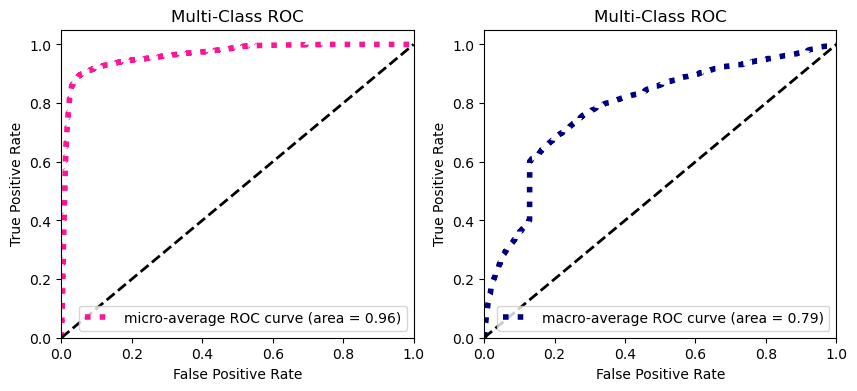

In [29]:
n_classes = 5

# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()

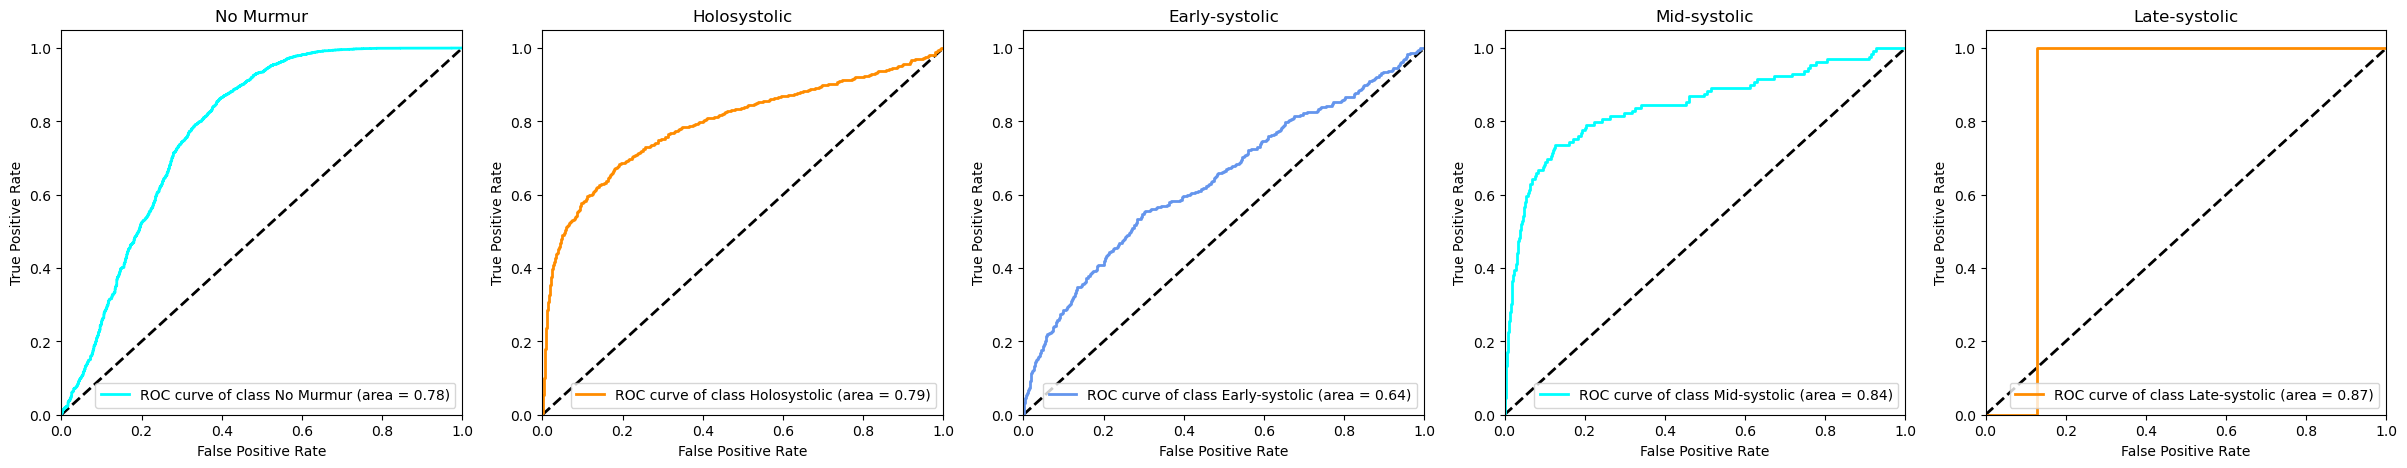

In [30]:
plt.close()
plt.figure(figsize=(30, 5))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
title = ['No Murmur', "Holosystolic", "Early-systolic", "Mid-systolic", "Late-systolic"]
for i, color in zip(range(n_classes), colors):
    if i == 0:
        plt.subplot(151)
    elif i == 1:
        plt.subplot(152)
    elif i == 2:
        plt.subplot(153)
    elif i == 3:
        plt.subplot(154)
    else:
        plt.subplot(155)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(title[i], roc_auc[i]))
    plt.legend(loc="lower right")
    
plt.show()